In [64]:
import numpy as np
import sys
import re
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from mapper import expand, parse_mapping_table


In [58]:
variants_df = pd.read_csv('../data/WES_variants.csv')
variants_df.head()

,SAMPLE,COSMIC_ID,Cancer Type,Gene,Transcript,cDNA,AA,Classification,Gene_list,Recurrence Filter,Subs,Truncating,inframe
0,KARPAS-45,907272,ALL,A1BG,ENST00000263100,c.842A>G,p.Y281C,missense,NaN,NaN,NaN,NaN,NaN
1,Jurkat,998184,ALL,A1BG,ENST00000263100,c.589G>A,p.A197T,missense,NaN,NaN,NaN,NaN,NaN
2,KARPAS-45,907272,ALL,A1BG,ENST00000263100,c.571G>A,p.A191T,missense,NaN,NaN,2.0,NaN,NaN
3,HT-115,907289,COAD/READ,A1BG,ENST00000263100,c.1456G>A,p.D486N,missense,NaN,NaN,NaN,NaN,NaN
4,KM12,905989,COAD/READ,A1BG,ENST00000263100,c.770C>A,p.T257N,missense,NaN,NaN,NaN,NaN,NaN


In [3]:
variants_df.count()

SAMPLE               486243
COSMIC_ID            486243
Cancer Type          409611
Gene                 486243
Transcript           486243
cDNA                 486243
AA                   486243
Classification       486243
Gene_list             24214
Recurrence Filter     29214
Subs                  52568
Truncating            65745
inframe                 441
dtype: int64

In [2]:
variants_df.Classification.unique()

NameError: name 'variants_df' is not defined

In [4]:
variants_by_cell_line_df = variants_df[variants_df['COSMIC_ID'] == 753535]

In [5]:
variants_by_cell_line_df.head(100)

,SAMPLE,COSMIC_ID,Cancer Type,Gene,Transcript,cDNA,AA,Classification,Gene_list,Recurrence Filter,Subs,Truncating,inframe
4454,BHY,753535,HNSC,AC006465.3,ENST00000433511,c.262G>A,p.D88N,missense,NaN,NaN,NaN,NaN,NaN
4860,BHY,753535,HNSC,AC010872_2,ENST00000405799,c.4690G>C,p.E1564Q,missense,NaN,NaN,NaN,NaN,NaN
5446,BHY,753535,HNSC,AC104809.3,ENST00000430980,c.2057A>T,p.D686V,missense,NaN,NaN,NaN,NaN,NaN
6741,BHY,753535,HNSC,ACER2,ENST00000340967,c.185G>C,p.S62T,missense,NaN,NaN,NaN,NaN,NaN
7244,BHY,753535,HNSC,ACP1,ENST00000272067,c.364C>G,p.P122A,missense,NaN,NaN,NaN,NaN,NaN
9342,BHY,753535,HNSC,ADAM21,ENST00000267499,c.945A>G,p.I315M,missense,NaN,NaN,NaN,NaN,NaN
11613,BHY,753535,HNSC,ADCK1,ENST00000238561,c.1217T>C,p.I406T,missense,NaN,NaN,NaN,NaN,NaN
12974,BHY,753535,HNSC,ADPGK,ENST00000311669,c.905C>T,p.T302I,missense,NaN,NaN,NaN,NaN,NaN
13151,BHY,753535,HNSC,ADRB1,NM_000684.1,c.1181C>T,p.A394V,missense,NaN,NaN,NaN,NaN,NaN
13210,BHY,753535,HNSC,ADRBK2,NM_005160,c.1078G>A,p.E360K,missense,NaN,NaN,NaN,NaN,NaN


In [6]:
variants_by_cell_line_df.count()

SAMPLE               353
COSMIC_ID            353
Cancer Type          353
Gene                 353
Transcript           353
cDNA                 353
AA                   353
Classification       353
Gene_list             18
Recurrence Filter     10
Subs                  37
Truncating            28
inframe                0
dtype: int64

## Mutation Feature Prep

In [7]:
# from http://oncokb.org/#/cancerGenes
OncoKB_mut = pd.read_csv("../data/allAnnotatedVariants.txt",sep ="\t", encoding='latin-1')
OncoKB_gtype = pd.read_csv("../data/allCuratedGenes.txt",sep ="\t")


In [8]:
OncoKB_gtype.head()

,Isoform,RefSeq,Entrez Gene ID,Hugo Symbol,Is Oncogene,Is Tumor Suppressor Gene,Highest Level of Evidence(sensitivity),Highest Level of Evidence(resistance),Summary
0,ENST00000318560,NM_005157.4,25,ABL1,Yes,No,1,R1,NaN
1,ENST00000502732,NM_007314.3,27,ABL2,Yes,No,NaN,NaN,NaN
2,ENST00000331925,NM_001199954.1,71,ACTG1,No,Yes,NaN,NaN,NaN
3,ENST00000263640,NM_001111067.2,90,ACVR1,Yes,No,NaN,NaN,NaN
4,ENST00000220592,NM_012154.3,27161,AGO2,No,No,NaN,NaN,NaN


In [23]:
#OncoKB_gtype = OncoKB_gtype[['Hugo Symbol ', u'Oncogene /TSG ']]

og_genes = []
tsg_genes = []
og_tsg_genes = [] 

#for key in OncoKB.keys():
#    OncoKB[key] = set(map(str.rstrip, list(set(OncoKB_gtype.loc[OncoKB_gtype['Oncogene /TSG ']== OncoKB[key],'Hugo Symbol '].values))))
#OncoKB["OG"].update(OncoKB["OG_TSG"])
#OncoKB["TSG"].update(OncoKB["OG_TSG"]) 

for index, row in OncoKB_gtype.iterrows():
    if row['Is Oncogene'] == 'Yes':
        og_genes.append(row['Hugo Symbol'])
    
    if row['Is Tumor Suppressor Gene'] == 'Yes':
        tsg_genes.append(row['Hugo Symbol'])
        
    if row['Is Oncogene'] =='Yes' and row['Is Tumor Suppressor Gene'] == 'Yes':
        og_tsg_genes.append(row['Hugo Symbol'])

OncoKB = {"OG":set(og_genes),"TSG": set(tsg_genes),"OG_TSG": set(og_tsg_genes)}


print("OncoKB OG:",len(OncoKB["OG"]),"TSG:",len(OncoKB["TSG"]),"OG_TSG:",len(OncoKB["OG_TSG"]))

OncoKB OG: 276 TSG: 285 OG_TSG: 33


In [20]:
# gene_id - Entrez Gene ID 
# df - all mutations in sample
#    columns: "aa_pos","function", "Entrez_gene_ID"
# hotspots - table of known hotsport  "Entrez_gene_ID" and "aa_pos"

def distance_to_hotspot(gene_id,df_gene, hotspots):
    '''Returns minimal distance between point mutation in gene and known hotspot'''
    # consider only GoF because LoF affect the whole protein and not a certian point
    df_gene = df_gene.loc[df_gene["function"] == "point_mutation"]
    df_hotspots = hotspots.loc[hotspots["Entrez_gene_ID"] == gene_id, :]
    dist = 100000
    for s,e in set(df_gene["aa_pos"].values):
        for hs, he in set(df_hotspots["aa_pos"].values):
            dist = min(dist, abs(s-hs),abs(s-he), abs(e-hs), abs(e-he))
    return dist

def mutations2score(df,TSG,OG,hotspots, w=0.05,verbose = False):
    # define gene type
    gene_scores = {}
    for gene_id in list(set(df["Entrez_gene_ID"].values)):
        df_gene = df.loc[df["Entrez_gene_ID"] == gene_id, :]
        # functions of mutations
        mut_functions = set(df_gene["function"].values)
        if gene_id in TSG:
            # check for truncating mutations:
            # score is -1 if any
            if "truncating_mutation" in mut_functions:
                gene_scores[gene_id] =-1
            else:
                # in mutation is not truncating, 
                # get the distance to closets hotspot if any 
                dist = distance_to_hotspot(gene_id, df_gene, hotspots)
                # set abs. maximal of 1/(dist+1) and 2w which corresponds LoF in unannotatedd gene
                gene_scores[gene_id] = -max(1.0/(dist+1),2*w)
        elif gene_id in OG:
            if "point_mutation" in mut_functions:
                dist = distance_to_hotspot(gene_id, df_gene, hotspots)
                if "truncating_mutation" in mut_functions:
                    if verbose:
                        print("GoF at dist",dist,"from hotspot in Oncogene with GoF",file = sys.stderr)
                        print(df_gene,file = sys.stderr)
                    if 1.0/(dist+1) > 2*w:
                        # if there is a mutation close to hotspot
                        # despite LoF it is likely a driver and the second copy of this gene is broken
                        # this happens in sampl 905968  in PIK3CA gene (5290)
                        gene_scores[gene_id] = 1.0/(dist+1)
                    else:
                        # otherwise we set -1 to differentiate it from neutral mutations
                        # because oncogene might turn on after domain truncation
                        gene_scores[gene_id] = -1
                else:
                    # non-hotspot mutation in non-LoF oncogene - small positive value
                    gene_scores[gene_id] = max(1.0/(dist+1),w)
            else:
                # only LoF mutations, oncogene is likely not functional or
                # it is turned-on after truncting mutations
                # therefore we set -1 to differentiate it from neutral mutations
                gene_scores[gene_id] = -1
            
            
        else: # if unknown_significance
            if "truncating_mutation" in mut_functions:
                gene_scores[gene_id] = -2.0*w
            else:
                gene_scores[gene_id] = -w
    
    return pd.Series(gene_scores)

In [9]:
bailye = {"OG":[],"TSG":[],"OG_TSG":[]}
bailye_drivers = pd.read_excel("../data/mmc1.xlsx", sheet_name="Table S1", 
                               skiprows = 3)
bailye_drivers = bailye_drivers[["Gene","Tumor suppressor or oncogene prediction (by 20/20+)"]]
#print(bailye_drivers.shape[0])
bailye_drivers.drop_duplicates(inplace=True)
bailye_drivers.columns = ["gene", "role"]
#print(bailye_drivers.shape[0])
bailye_drivers.fillna("NA", inplace = True)
bailye_drivers["role"] = bailye_drivers["role"].apply(lambda x: x.replace("possible ",""))
bailye_drivers.drop_duplicates(inplace=True)
#print(bailye_drivers.shape[0])
bailye_drivers.loc[bailye_drivers.duplicated("gene", keep=False),:]
#print(len(set(bailye_drivers["gene"].values)))
bailye["OG"] = bailye_drivers.loc[bailye_drivers["role"] == "oncogene",:]
bailye["OG"] = set(bailye["OG"]["gene"].values)
bailye["TSG"] = bailye_drivers.loc[bailye_drivers["role"] == "tsg",:]
bailye["TSG"] = set(bailye["TSG"]["gene"].values)
bailye["OG_TSG"] = bailye["OG"].intersection(bailye["TSG"])
print("Bailey_2018 OG:",len(bailye["OG"]),"TSG:",len(bailye["TSG"]),"both:", len(bailye["OG_TSG"]))

Bailey_2018 OG: 115 TSG: 162 both: 18


In [17]:
print(bailye)

{'OG': {'COL5A1', 'PPP6C', 'MAP2K1', 'PTPRC', 'RHOA', 'DIAPH2', 'SPOP', 'LZTR1', 'PLXNB2', 'MAPK1', 'GNAQ', 'CARD11', 'FOXA1', 'EP300', 'PLCB4', 'GNA11', 'WHSC1', 'MYH9', 'IDH2', 'MAX', 'MTOR', 'ACVR1', 'DHX9', 'RHOB', 'CTNNB1', 'PIK3R1', 'MYD88', 'PMS1', 'SETBP1', 'ERBB3', 'PIK3R2', 'MACF1', 'FBXW7', 'MYCN', 'GNAS', 'GNA13', 'RET', 'EEF1A1', 'UNCX', 'PDGFRA', 'PIK3CG', 'CDKN1A', 'CDH1', 'CACNA1A', 'FLT3', 'ERBB4', 'MET', 'NRAS', 'SMC1A', 'FGFR3', 'PTPDC1', 'KLF5', 'MECOM', 'CUL1', 'KRAS', 'RAC1', 'TAF1', 'RXRA', 'SMAD4', 'H3F3A', 'CCND1', 'BRAF', 'ARID1A', 'CDK4', 'KEAP1', 'KIT', 'BCOR', 'DACH1', 'ZCCHC12', 'PIM1', 'CNBD1', 'SMARCB1', 'WT1', 'MED12', 'HIST1H1E', 'SMC3', 'EGFR', 'PLCG1', 'MYC', 'ERCC2', 'CHD4', 'FAM46D', 'U2AF1', 'EPAS1', 'CD79B', 'GTF2I', 'MSH3', 'TP53', 'NFE2L2', 'NPM1', 'POLRMT', 'SOS1', 'RRAS2', 'FGFR2', 'ERBB2', 'EIF1AX', 'AKT1', 'PIK3CA', 'SF3B1', 'SOX17', 'DICER1', 'GRIN2D', 'IDH1', 'HRAS', 'ZNF133', 'CEBPA', 'XPO1', 'PTPN11', 'PPP2R1A', 'RQCD1', 'CYSLTR2', 'DMD

In [11]:
hotspots2D_subst = pd.read_excel("../data/hotspots_v2.xls","SNV-hotspots")
hotspots2D_indels = pd.read_excel("../data/hotspots_v2.xls","INDEL-hotspots")
print("1D mutations",hotspots2D_subst.shape[0],hotspots2D_indels.shape[0] )
hotspots2D_subst = hotspots2D_subst.loc[~hotspots2D_subst["Amino_Acid_Position"].str.contains("splice")]
hotspots2D_subst = hotspots2D_subst[["Hugo_Symbol","Amino_Acid_Position"]]
hotspots2D_subst.drop_duplicates(inplace=True)
hotspots2D_indels = hotspots2D_indels[["Hugo_Symbol","Amino_Acid_Position"]]
hotspots2D_indels.drop_duplicates(inplace=True)
print("1D hotspots",hotspots2D_subst.shape[0],hotspots2D_indels.shape[0] )
cBioPortal_muts = pd.concat([hotspots2D_subst,hotspots2D_indels],axis =0)
cBioPortal_muts_ = cBioPortal_muts.loc[cBioPortal_muts["Amino_Acid_Position"].str.contains("-"),:]
cBioPortal_muts = cBioPortal_muts.loc[~cBioPortal_muts["Amino_Acid_Position"].str.contains("-"),:]
cBioPortal_muts["Amino_Acid_Position"] = cBioPortal_muts["Amino_Acid_Position"].apply(int)
#cBioPortal_muts["start"] = cBioPortal_muts["Amino_Acid_Position"]
#cBioPortal_muts["end"] = cBioPortal_muts["Amino_Acid_Position"]
cBioPortal_muts["aa_pos"] = cBioPortal_muts["Amino_Acid_Position"].apply(lambda x : (x,x))

#cBioPortal_muts_ ["start"] = cBioPortal_muts_["Amino_Acid_Position"].apply(lambda x: int(x.split("-")[0]))
#cBioPortal_muts_["end"] = cBioPortal_muts_["Amino_Acid_Position"].apply(lambda x: int(x.split("-")[1]))
cBioPortal_muts_["aa_pos"] = cBioPortal_muts_["Amino_Acid_Position"].apply(lambda x : tuple(map(int,x.split("-"))))

cBioPortal_muts = pd.concat([cBioPortal_muts_,cBioPortal_muts],axis = 0)
cBioPortal_muts["source"] = "1D"


### 3D

cBioPortal_3D = pd.read_excel("../data/3d_hotspots.xls","Table S5")
cBioPortal_3D = cBioPortal_3D[["Gene","Amino_Acid_Position"]]
print("3D mutations",cBioPortal_3D.shape[0])
cBioPortal_3D.drop_duplicates(inplace=True)
print("3D hotspots ",cBioPortal_3D.shape[0])
cBioPortal_3D["Amino_Acid_Position"] = cBioPortal_3D["Amino_Acid_Position"].apply(int)
#cBioPortal_3D["start"] = cBioPortal_3D["Amino_Acid_Position"]
#cBioPortal_3D["end"] = cBioPortal_3D["Amino_Acid_Position"]
cBioPortal_3D["aa_pos"] = cBioPortal_3D["Amino_Acid_Position"].apply(lambda x : (x,x))
cBioPortal_3D.rename({"Gene":'Hugo_Symbol'}, axis="columns",inplace=True)
cBioPortal_3D["source"] = "3D"
cBioPortal_muts = cBioPortal_muts[["Hugo_Symbol","aa_pos"]]
cBioPortal_3D = cBioPortal_3D[["Hugo_Symbol","aa_pos"]]
cBioPortal_muts = pd.concat([cBioPortal_3D, cBioPortal_muts],axis=0)
cBioPortal_muts.sort_values(["Hugo_Symbol"],ascending = True,inplace=True)

cBioPortal_genes = set(cBioPortal_muts["Hugo_Symbol"].values)
print("genes with hotspot",len(cBioPortal_genes))
cBioPortal_muts = cBioPortal_muts[["Hugo_Symbol","aa_pos"]]
cBioPortal_muts.drop_duplicates(inplace=True)
print("unique hotspots",cBioPortal_muts.shape[0])
#cBioPortal_muts

1D mutations 3004 495
1D hotspots 1024 55
3D mutations 9512
3D hotspots  3395
genes with hotspot 688
unique hotspots 4258


In [15]:
NCBI = pd.read_csv("../data/Homo_sapiens.gene_info",sep = "\t")
NCBI = NCBI[["#tax_id","GeneID","Symbol","Synonyms","type_of_gene"]]
NCBI = NCBI.loc[NCBI["#tax_id"] == 9606]
NCBI = NCBI.loc[NCBI["type_of_gene"] != "unknown"]
ncbi_symbols = parse_mapping_table(NCBI, "Symbol","GeneID")

Ok: no empty rows detected
Ok: no duplicated pairs detected
Ok: All Symbol rows are not empty.
Ok: All Symbol are mapped to GeneID
13 Symbol mapped to multiple GeneID
Ok: All GeneID are unique
59665 Symbol can be mapped directly to GeneID


In [24]:
print("genes with and without mutations")
for kind in ["OG","TSG","OG_TSG"]:
    oncokb = OncoKB[kind].intersection(cBioPortal_genes) 
    b = bailye[kind].intersection(cBioPortal_genes)
    print(kind,"oncokb", len(oncokb),"/",len(OncoKB[kind]),
         "Bailye_2018", len(b),"/",len(bailye[kind]))

genes with and without mutations
OG oncokb 117 / 276 Bailye_2018 81 / 115
TSG oncokb 130 / 285 Bailye_2018 81 / 162
OG_TSG oncokb 16 / 33 Bailye_2018 14 / 18


In [25]:
for kind in ["OG","TSG","OG_TSG"]:
    oncokb = OncoKB[kind]#.intersection(cBioPortal_genes) 
    b = bailye[kind]#.intersection(cBioPortal_genes)
    print(kind,"oncokb", len(oncokb),
         "Bailye_2018", len(b),"union",len(b.union(oncokb)),
         "mutated:",
         len(b.union(oncokb).intersection(cBioPortal_genes)))

OG oncokb 276 Bailye_2018 115 union 335 mutated: 148
TSG oncokb 285 Bailye_2018 162 union 351 mutated: 142
OG_TSG oncokb 33 Bailye_2018 18 union 49 mutated: 29


In [26]:
# TSG - not necessarity with a hotspot, take union of OncoKB and  Bailye_2018
TSG = OncoKB["TSG"].union(bailye["TSG"])
# OG - must have a hotspot 
OG = OncoKB["OG"].union(bailye["OG"]).intersection(cBioPortal_genes)
print("TSG:",len(TSG),"with hotspots:",len(TSG.intersection(cBioPortal_genes)),
      "\nOG with hotspots:",len(OG))
# list of hotspots: 
hotspots = cBioPortal_muts.loc[cBioPortal_muts["Hugo_Symbol"].isin(OG|TSG),:]
print("Hotspots (all from cBioPortal):", cBioPortal_muts.shape[0],
      "\n\ton OG:", hotspots.loc[hotspots["Hugo_Symbol"].isin(OG)].shape[0],
      "\n\ton TSG:", hotspots.loc[hotspots["Hugo_Symbol"].isin(TSG)].shape[0])
hotspots.head(5)

TSG: 351 with hotspots: 142 
OG with hotspots: 148
Hotspots (all from cBioPortal): 4258 
	on OG: 1128 
	on TSG: 1056


,Hugo_Symbol,aa_pos
1456,ACVR1,"(206, 206)"
1307,ACVR1,"(258, 258)"
1128,ACVR1,"(328, 328)"
2542,ACVR1B,"(398, 398)"
2056,ACVR1B,"(401, 401)"


In [27]:
ncbi_synonyms = expand(NCBI[["Synonyms","GeneID"]],column="Synonyms",sep="|") 
ncbi_synonyms = parse_mapping_table(ncbi_synonyms, "Synonyms","GeneID")

Ok: no empty rows detected
Ok: no duplicated pairs detected
Ok: All Synonyms rows are not empty.
Ok: All Synonyms are mapped to GeneID
3198 Synonyms mapped to multiple GeneID
50201 different Synonyms mapped to the same GeneID
10893 Synonyms can be mapped directly to GeneID


In [55]:
def apply_mappers(df, main_mapper, alt_mapper, verbose = True,handle_duplicates = "keep"):
    '''Converts IDs in DF indices.\n
    handle_duplicates  - how to deal with duplicated IDs in the resulted DF:\n
    \tsum - group by index and sum\n
    \taverage - group by index and keep average\n
    \tdrop - drop duplicates\n
    \tkeep - do nothing.'''
    
    
    ID_list = list(df.index.values)
    
    # main mapper, e.g. NCBI symbol -> Entrez Gene ID
    symbols_mapped_directly = {}
    recognized_not_mapped = [] # found in target IDs of mapper but not 
    symbol_one2many = [] # not mapped because of ambiguity
    symbol_many2one = [] # not mapped because of ambiguity
    # Alternative mapper
    # applied in case the main mapper failed: e.g. NCBI synonym -> NCBI symbol -> Entrez Gene ID
    via_alt_symbol = {}
    via_nonuniq_alt_symbol = {}
    alt_symbol_one2many = []  # 
    synonym_match_current_symbol = [] # these synonyms are not used in mapping because they match with ID in main mapped
    not_found_at_all =[]
    loc = {}
    loc_not_found =[]

    # store all valid target IDs
    
    valid_target_ids = []
    valid_target_ids.append(list(main_mapper["one-to-one"]))
    valid_target_ids.append(list(main_mapper["many-to-one"]))
    valid_target_ids.append(list(alt_mapper["one-to-one"]))
    valid_target_ids.append(list(alt_mapper["many-to-one"]))
    
    #valid_target_ids = set() + set(main_mapper["many-to-one"].values()) + set(alt_mapper["one-to-one"].values()) + set(alt_mapper["many-to-one"].values())
    one_to_many_targets = list(main_mapper["one-to-many"].values())
    one_to_many_targets.append(list(alt_mapper["one-to-many"].values()))
    
    for l in one_to_many_targets:
        valid_target_ids += l
        
       
    for symbol in ID_list:
        if symbol in main_mapper["one-to-one"].keys():
            symbols_mapped_directly[symbol] = main_mapper["one-to-one"][symbol]
        elif  symbol in main_mapper["one-to-none"]:
            recognized_not_mapped.append(symbol)
        elif symbol in main_mapper["one-to-many"].keys():
            symbol_one2many.append(symbol)
        elif symbol in main_mapper["many-to-one"].keys():
            symbol_many2one.append(symbol)
        # alternative mappper
        elif symbol in alt_mapper["one-to-one"].keys():
            via_alt_symbol[symbol] = alt_mapper["one-to-one"][symbol]
        elif symbol in alt_mapper["one-to-many"].keys():
            alt_symbol_one2many.append(symbol)
        elif symbol in alt_mapper["many-to-one"].keys(): # it is Ok if many synonyms match 
            via_nonuniq_alt_symbol[symbol] = alt_mapper["many-to-one"][symbol]
        elif symbol.startswith("LOC"):
            LOC_id = int(symbol[3:])
            if LOC_id in valid_target_ids:
                loc[symbol] = LOC_id
            else:
                loc_not_found.append(symbol)
        else:
            not_found_at_all.append(symbol)
        
    query2target ={}
    for symbol in [symbols_mapped_directly,via_alt_symbol,via_nonuniq_alt_symbol,loc]:
        query2target.update(symbol)
    not_mapped = recognized_not_mapped +symbol_one2many+ alt_symbol_one2many + loc_not_found + not_found_at_all+ symbol_many2one
    
    if verbose:
        print("Mapped:",len(query2target.keys()), 
      "\n\tdirectly via main_mapper",len(symbols_mapped_directly.keys()),
     "\n\tvia alternative mapper",len(via_alt_symbol.keys()),
      "\n\tvia one of multiple synonyms in alternative mapper",len(via_nonuniq_alt_symbol.keys()),
      "\n\tLOC",len(loc.keys()),
      "\nUnmapped:",len(not_mapped),
      "\n\trecognized symbols without Entrez ID",len(recognized_not_mapped),
      "\n\tmultiple query_ids map to the same target_id",len(symbol_many2one),
      "\n\tquery_ids map to multiple target_ids in the main mapper",len(symbol_one2many),
      "\n\tquery_ids map to multiple target_ids in the alternative mapper",len(alt_symbol_one2many),
      "\n\tLOC not found in Entrez",len(loc_not_found),
     "\n\tNot found at all:",len( not_found_at_all))
    
    # find duplicated 
    mapped_symbols = pd.Series(query2target)
    dups = mapped_symbols[mapped_symbols.duplicated(keep=False)].index.values
    if len(dups) >0:
        print("Warning: query IDs mapping to duplicated target IDs in mapping table:", len(dups))
        #if verbose:
        #    print("IDs mapped to multiple target IDs:\n", dups,file=sys.stderr)
    
    # exclude not mapped query IDs and map
    df_size_dif = df.shape[0]
    df = df.loc[~df.index.isin(not_mapped ),:].copy()
    df_size_dif = df_size_dif - df.shape[0]
    if df_size_dif > 0:
        print("Warning: query IDs not mapped to any target IDs excluded:", df_size_dif)
    df.rename(mapper=query2target, axis='index',inplace=True)
    

    # sum genes genes (sum of duplicated Entrez IDs)
    if handle_duplicates == "keep":
        if verbose:
            dups = df.groupby(df.index).size()
            dups = list(set(dups[dups>1].index.values))
            print("IDs mapped to multiple target IDs are kept:\n", dups, file=sys.stderr)
    elif handle_duplicates == "sum":
        df = df.groupby(df.index).apply(sum)
    elif handle_duplicates == "average":
        df = df.groupby(df.index).apply(np.average)
    elif handle_duplicates == "drop":
        df = df.loc[~dups,:].copy()
    else:
        print("'handle_duplicates' must be keep, sum, average or drop.", file =sys.stderr)
        return None
    df.sort_index(inplace=True)
    return (df,query2target,not_mapped)
    

In [56]:
tsg_og_gene_names = pd.DataFrame.from_dict({"genes":dict(zip(list(OG | TSG),list(OG | TSG)))})
tsg_og_gene_names, query2target, not_mapped = apply_mappers(tsg_og_gene_names, ncbi_symbols, ncbi_synonyms, verbose = True,handle_duplicates = "keep")
OG_entrez = set(map(lambda x : query2target[x],OG))
TSG_entrez = set(map(lambda x : query2target[x],TSG))
hotspots["Entrez_gene_ID"] = hotspots["Hugo_Symbol"].apply(lambda x : query2target[x])
hotspots.head()

Mapped: 458 
	directly via main_mapper 446 
	via alternative mapper 2 
	via one of multiple synonyms in alternative mapper 10 
	LOC 0 
Unmapped: 0 
	recognized symbols without Entrez ID 0 
	multiple query_ids map to the same target_id 0 
	query_ids map to multiple target_ids in the main mapper 0 
	query_ids map to multiple target_ids in the alternative mapper 0 
	LOC not found in Entrez 0 
	Not found at all: 0


IDs mapped to multiple target IDs are kept:
 []
/Users/kbloom/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


,Hugo_Symbol,aa_pos,Entrez_gene_ID
1456,ACVR1,"(206, 206)",90
1307,ACVR1,"(258, 258)",90
1128,ACVR1,"(328, 328)",90
2542,ACVR1B,"(398, 398)",91
2056,ACVR1B,"(401, 401)",91


## GDSC Feature Mapping

In [59]:
gdsc  = variants_df[["COSMIC_ID","Gene","AA","Classification"]]
gdsc.head(3)


,COSMIC_ID,Gene,AA,Classification
0,907272,A1BG,p.Y281C,missense
1,998184,A1BG,p.A197T,missense
2,907272,A1BG,p.A191T,missense


In [60]:
gdsc.groupby("Classification").size().sort_values(ascending = False)

Classification
missense       413252
frameshift      31933
nonsense        23359
ess_splice      13106
inframe          3185
Missense          884
stop_lost         486
gene_fusion        38
dtype: int64

/Users/kbloom/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/Users/kbloom/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


mean 485.7 median 288.0


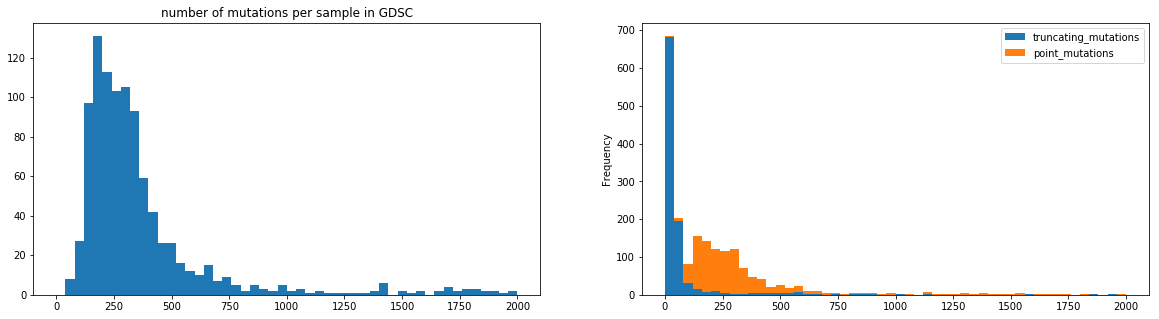

In [61]:
# define functional effect of a mutation 
gdsc_truncating = ['frameshift','nonsense','stop_lost','ess_splice']
gdsc_point = ['missense','Missense','inframe']
gdsc.loc[gdsc["Classification"].isin(gdsc_truncating),"function"] = "truncating_mutation"
gdsc.loc[gdsc["Classification"].isin(gdsc_point),"function"] = "point_mutation"
gdsc = gdsc.loc[gdsc["Classification"].isin(gdsc_truncating+gdsc_point),:]

plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
n_mutations_gdsc = gdsc.groupby("COSMIC_ID").size().sort_values(ascending = False)
tmp = plt.hist(n_mutations_gdsc, bins=50,range = (0,2000))
tmp = plt.title("number of mutations per sample in GDSC")
ax = plt.subplot(1,2,2)
n_LoF = gdsc.loc[gdsc["Classification"].isin(gdsc_truncating ),:].groupby("COSMIC_ID").size().sort_values(ascending = False)
n_GoF = gdsc.loc[gdsc["Classification"].isin(gdsc_point),:].groupby("COSMIC_ID").size().sort_values(ascending = False)
df = pd.DataFrame.from_dict({"truncating_mutations":n_LoF,"point_mutations":n_GoF})
#tmp = plt.hist(n_LoF, bins=50)
#tmp = plt.title("LoF mutations per sample in GDSC")
df.plot.hist(stacked = True, bins = 50,ax =ax,range = (0,2000))
print("mean",round(np.mean(n_mutations_gdsc),1), "median",np.median(n_mutations_gdsc))

In [62]:
def binarize(x):
    if x==0:
        return x
    else:
        return 1

def get_aa_pos_GDSC(x):
    l = re.findall(r'\d+', x)
    if len(l) == 0:
        #print(x, "positions not found.",file = sys.stderr)
        return ("NA","NA")
    elif len(l) == 1:
        return (int(l[0]), int(l[0]))
    else:
        return (int(l[0]), int(l[1]))

In [65]:

gdsc["aa_pos"] = gdsc["AA"].apply(lambda x : get_aa_pos_GDSC(x))
#gdsc["start"] = gdsc["aa_pos"].apply(lambda x : x.split(",")[0])
#gdsc["end"] = gdsc["aa_pos"].apply(lambda x : x.split(",")[1])
gdsc.head(5)

,COSMIC_ID,Gene,AA,Classification,function,aa_pos
0,907272,A1BG,p.Y281C,missense,point_mutation,"(281, 281)"
1,998184,A1BG,p.A197T,missense,point_mutation,"(197, 197)"
2,907272,A1BG,p.A191T,missense,point_mutation,"(191, 191)"
3,907289,A1BG,p.D486N,missense,point_mutation,"(486, 486)"
4,905989,A1BG,p.T257N,missense,point_mutation,"(257, 257)"


In [66]:
ensg_genes = []
symbols = []
for gene in set(gdsc["Gene"].values):
    if gene.startswith("ENSG"):
        ensg_genes.append(gene)
        
    else:
        symbols.append(gene)
print("ENSEMBL gene IDs found:",len(ensg_genes))
ensg_genes = gdsc.loc[gdsc["Gene"].isin(ensg_genes), :]
gdsc_hugo =  gdsc.loc[gdsc["Gene"].isin(symbols), :]
print("Gene symbols:",len(set(gdsc_hugo["Gene"].values)))

ENSEMBL gene IDs found: 101
Gene symbols: 18989


In [67]:
# mapping to Entrez
df = gdsc_hugo[["Gene"]].copy()
df.set_index("Gene",drop= False ,inplace=True)
df.drop_duplicates(inplace = True)
df, query2target,not_mapped  = apply_mappers(df, ncbi_symbols, ncbi_synonyms, verbose = True,handle_duplicates = "keep")

Mapped: 18466 
	directly via main_mapper 16773 
	via alternative mapper 472 
	via one of multiple synonyms in alternative mapper 1221 
	LOC 0 
Unmapped: 523 
	recognized symbols without Entrez ID 0 
	multiple query_ids map to the same target_id 0 
	query_ids map to multiple target_ids in the main mapper 0 
	query_ids map to multiple target_ids in the alternative mapper 64 
	LOC not found in Entrez 36 
	Not found at all: 423


IDs mapped to multiple target IDs are kept:
 [143872, 341019, 27177, 387119, 84530, 26165, 11321, 122945, 150082, 728642, 2122, 79949, 157777, 6241, 100289124, 8805, 127602, 387707, 345222, 84108, 91283, 84631, 144535, 245913, 388761, 4253, 163486, 54438, 283310, 84148, 57018, 284352, 5315, 339669, 23254, 23272, 119016, 340204, 64753, 64760, 25849, 286464, 129285, 4360, 10507, 4883, 5414, 23334, 256815, 23345, 57662, 54617, 84316, 200030, 10592, 57705, 246126, 92017, 126321, 10613, 374, 445815, 79741, 51586, 647060, 284565, 63895, 201625, 29086, 1954, 9127, 55719, 29099, 941, 155066, 140733, 114112, 85452, 139728, 84458, 23028, 54777, 79868]


In [68]:
gdsc_hugo = gdsc_hugo.loc[~gdsc_hugo["Gene"].isin(not_mapped),:].copy()
gdsc_hugo["Entrez_gene_ID"] = gdsc_hugo["Gene"].apply(lambda x : query2target[x])
gdsc_hugo.head(10)

,COSMIC_ID,Gene,AA,Classification,function,aa_pos,Entrez_gene_ID
0,907272,A1BG,p.Y281C,missense,point_mutation,"(281, 281)",1
1,998184,A1BG,p.A197T,missense,point_mutation,"(197, 197)",1
2,907272,A1BG,p.A191T,missense,point_mutation,"(191, 191)",1
3,907289,A1BG,p.D486N,missense,point_mutation,"(486, 486)",1
4,905989,A1BG,p.T257N,missense,point_mutation,"(257, 257)",1
5,909698,A1BG,p.R90H,missense,point_mutation,"(90, 90)",1
6,905971,A1BG,p.T46M,missense,point_mutation,"(46, 46)",1
7,909761,A1BG,p.P41fs*33,frameshift,truncating_mutation,"(41, 33)",1
8,1327769,A1BG,p.E249D,missense,point_mutation,"(249, 249)",1
9,1330931,A1BG,p.Y184*,nonsense,truncating_mutation,"(184, 184)",1


In [71]:
w = 0.05



gdsc_scores = {}
for sample in list(set(gdsc_hugo["COSMIC_ID"].values)):
    df = gdsc_hugo.loc[gdsc_hugo["COSMIC_ID"] == sample,:]
    gdsc_scores[sample] = mutations2score(df, TSG_entrez,OG_entrez, hotspots, w=w)
gdsc_scores = pd.DataFrame.from_dict(gdsc_scores)
gdsc_scores.fillna(0,inplace=True)
#import seaborn as sns
#sns.heatmap(gdsc_scores.loc[[7157,5290,3845,2312,4893],:])
gdsc_scores.to_csv("../data/GDSC.non_bin_mutations.tsv",sep = "\t")
gdsc_scores.loc[[7157,5290,3845,4893],:]

,907268,907269,907270,907271,907272,907273,907274,907275,907276,907277,...,753620,753621,688086,753623,753622,753624,688087,753618,917486,688121
7157,-1.0,0.0,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.0,-1.0,...,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.0
5290,0.0,0.0,0.0,0.0,0.2,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3845,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4893,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [72]:
gdsc_scores = gdsc_scores.applymap(lambda x: binarize(x))
gdsc_scores.to_csv("../data/GDSC.binary_mutations.tsv",sep = "\t")
gdsc_scores.loc[[7157,5290,3845,2312,4893],:]

,907268,907269,907270,907271,907272,907273,907274,907275,907276,907277,...,753620,753621,688086,753623,753622,753624,688087,753618,917486,688121
7157,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,...,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0
5290,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3845,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2312,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4893,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
